# **클론코딩 느낀 점 및 배운 점**

## 1. **첨도 활용**
   첨도와 왜도를 개념적으로 배우긴 했으나, 실제로 이 내용을 활용하는 것은 보지 못했던 것 같습니다. 클론코딩 내용을 보면, 초반에 `describe()`을 활용해 중간값, 결측치, 왜도, 첨도를 활용하는 부분이 나오는데, 이 코드를 통해 왜도와 첨도를 확인하고 문제점을 발견하는 부분이 인상깊었습니다. 
```python
# 중간값, 결측치, 왜도, 첨도를 표시합니다.
df_stats = df.describe().T

median_results = []
skew_results = []
kurtosis_results = []
null_results = []

for idx, val in enumerate(df_stats.index):
    median_results.append(df[val].median())
    skew_results.append(df[val].skew())
    kurtosis_results.append(df[val].kurtosis())
    null_results.append(df[val].isnull().sum())

df_stats['median'] = median_results
df_stats['missing'] = null_results
df_stats['skewness'] = skew_results
df_stats['kurtosis'] = kurtosis_results
df_stats
```
 *"종속변수인 price의 왜도가 4.02로 치우쳐 있는 것을 확인할 수 있다"* -> 문제점을 파악하고 자연로그`np.log()`를 통해 분포를 조정하는 것을 확인할 수 있었습니다.

## 2. **타입 분류**
   `info()`를 통해 데이터의 타입을 확인하는 방법은 많이 써봤으나 object타입과 int, float타입을 분류해서 데이터를 살펴보는 방법은 처음 보았습니다. 데이터형에 따라서 자료를 추출해야할 때 유용하겠다고 생각했습니다.
```python
def separate_dtype(DataFrame:df):
    df_obj = df.select_dtypes(include=['object'])
    df_numr = df.select_dtypes(include=['int64','float64'])
    return [df_obj, df_numr]

(df_obj, df_numr) = separate_dtype(df)
```
-> 이 코드를 통해 data의 전처리가 필요함을 쉽게 파악할 수 있었습니다.

## 3. **시각화**
   여러 시각화 방법들을 배웠지만, 아직 어떤 상황에 어떤 방법을 써야하는지 제대로 익히지 못한 상태였습니다. 클론코딩 내용을 보면 먼저 히스토그램`df.hist()`을 통해 독립 변수 데이터의 분포를 확인하고, 산점도`pairplot()`을 통해 종속 변수와 선형 관계가 있을 것 같은 독립 변수들을 선정하여 시각화했음을 알 수 있습니다. 또한 산점도를 통해 종속 변수와 독립 변수들 사이의 선형 관계를 대략적으로 파악하고 price와 sqft_living간의 선형관계를 확인한 후 히트맵`heatmap()`을 활용하여 상관관계 분석까지 이어지는 흐름을 볼 수 있었습니다. 이 과정들을 통해 시각화가 언제 어떤 방법으로 이루어져야하는지 조금이나마 감을 잡은 것 같습니다. 

## 4. **joinplot()**
   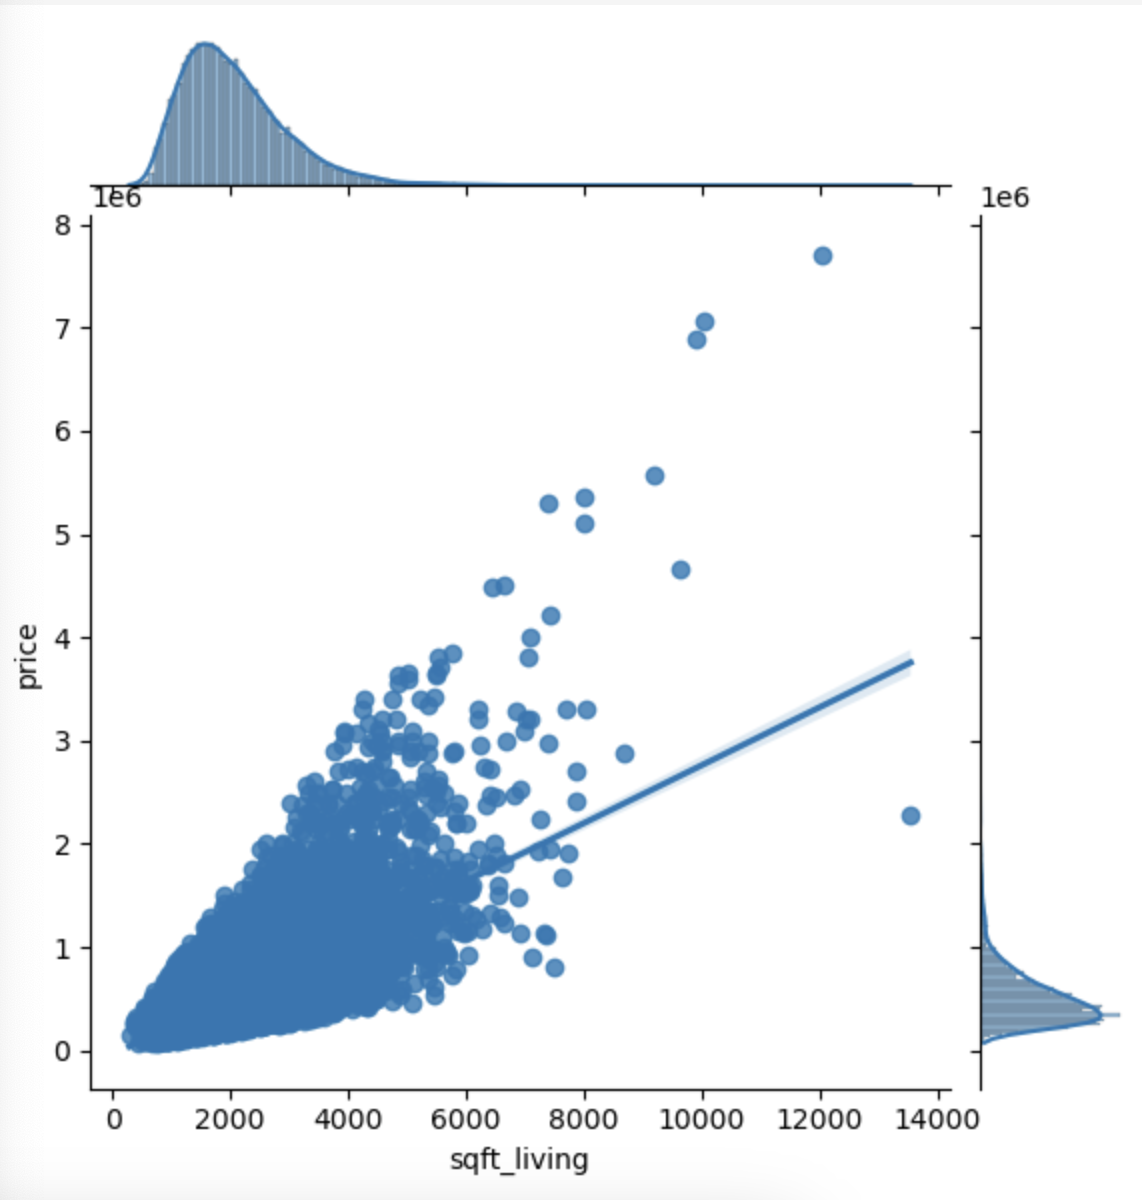
   선형관계를 확인할 때 이런 형태의 그래프는 처음봐서 신기했습니다. 오른쪽과 위쪽에 나타나는 그래프를 통해 두 변수들의 특징과 더불어 변수 간의 관계를 더욱 잘 파악할 수 있는 것 같습니다.

## 5. **가정 진단**

   오차에 대한 가정(정규성, 독립성, 등분산성 등)을 이론으로는 배웠으나 어떻게 검정하고 판단하는지는 예상이 잘 가지 않았습니다. 클론코딩의 마지막 부분을 보면 이에 대해 시각적으로 검증하는 것이 나오는데, 각각의 가정들을 이런 방법들을 통해 확인하는구나를 배울 수 있었습니다. 
   - **정규성 검정** -> Q-Q도표(`qqplot()`), 잔차 패턴 확인(`scatter()`), 샤피로-월크 검정(`stats.shapiro()`)
   - **독립성 검정** -> 잔차 그래프(`resid.plot()`), ACF(`sm.graphics.tsa.plot_acf()`)
   - **등분산성 검정** -> `distplot()`, `resid.plot()`
